In [ ]:
import tensorflow as tf
import numpy as np
import scipy.io
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Input, Dense, Activation, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import scipy.integrate

In [ ]:
#t=np.linspace(0,101,100)

In [ ]:
#print(t)

In [ ]:
#beta=0.6/(1+np.exp(-t))

In [ ]:
# plt.plot(t,beta)
# plt.grid()
# plt.show()

In [ ]:
def SIRModel2(y,t,beta,gamma):
  S,I = y
  beta = 0.7/(1+np.exp(-t))
  dSdt = -(beta*S*I)
  dIdt = (beta*S*I) - gamma*I

  return dSdt,dIdt

In [ ]:
# Initial Condition
S0 = 79999950/80000000
I0 = 50/80000000
#beta = 0.6
gamma = 0.25
print(S0)
print(I0)

0.999999375
6.25e-07


In [ ]:
tc = np.linspace(0,41,40000)
t1 = tc[0:5000]
t2 = tc[5000:10000]
t3 = tc[10000:15000]
t4 = tc[15000:20000] 
t5 = tc[20000:25000]
t6 = tc[25000:30000]
t7 = tc[30000:35000]
t8 = tc[35000:40000]
beta = 0.7/(1+np.exp(-tc))

In [ ]:
solution = scipy.integrate.odeint(SIRModel2,[S0,I0],tc,args=(beta,gamma))

In [ ]:
solution = np.array(solution)
S_t = solution[:,0]
I_t = solution[:,1]
R_t = 1-S_t-I_t

In [ ]:
tc = np.array(tc).reshape((40000,1))
t1 = np.array(t1).reshape((5000,1))
t2 = np.array(t2).reshape((5000,1))
t3 = np.array(t3).reshape((5000,1))
t4 = np.array(t4).reshape((5000,1))
t5 = np.array(t5).reshape((5000,1))
t6 = np.array(t6).reshape((5000,1))
t7 = np.array(t7).reshape((5000,1))
t8 = np.array(t8).reshape((5000,1))

In [ ]:
S_t1 = S_t[0:5000]
I_t1 = I_t[0:5000]

S_t2 = S_t[5000:10000]
I_t2 = I_t[5000:10000]

S_t3 = S_t[10000:15000]
I_t3 = I_t[10000:15000]

S_t4 = S_t[15000:20000]
I_t4 = I_t[15000:20000]

S_t5 = S_t[20000:25000]
I_t5 = I_t[20000:25000]

S_t6 = S_t[25000:30000]
I_t6 = I_t[25000:30000]

S_t7 = S_t[30000:35000]
I_t7 = I_t[30000:35000]

S_t8 = S_t[35000:40000]
I_t8 = I_t[35000:40000]

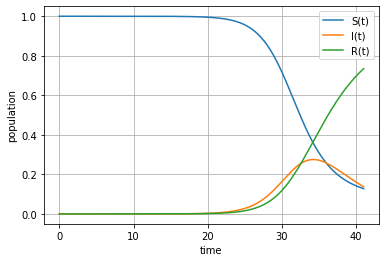

In [ ]:
plt.plot(tc,S_t, label = "S(t)")
plt.plot(tc,I_t, label = "I(t)")
plt.plot(tc,R_t, label = "R(t)")
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.show()

In [ ]:
S_test = np.hstack((S_t1,S_t2,S_t3,S_t4,S_t5,S_t6,S_t7,S_t8))
I_test = np.hstack((I_t1,I_t2,I_t3,I_t4,I_t5,I_t6,I_t7,I_t8))

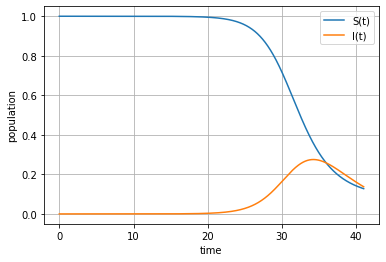

In [ ]:
# Plotting
plt.plot(tc,S_test, label = "S(t)")
plt.plot(tc,I_test, label = "I(t)")
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.show()

In [ ]:
# Convert To Tensor
tc = tf.convert_to_tensor(tc.astype('float32'))
t1 = tf.convert_to_tensor(t1.astype('float32'))
t2 = tf.convert_to_tensor(t2.astype('float32'))
t3 = tf.convert_to_tensor(t3.astype('float32'))
t4 = tf.convert_to_tensor(t4.astype('float32'))
t5 = tf.convert_to_tensor(t5.astype('float32'))
t6 = tf.convert_to_tensor(t6.astype('float32'))
t7 = tf.convert_to_tensor(t7.astype('float32'))
t8 = tf.convert_to_tensor(t8.astype('float32'))

In [ ]:
# Convert To Tensor
S_t = tf.convert_to_tensor(S_t.astype('float32'))
S_t1 = tf.convert_to_tensor(S_t1.astype('float32'))
S_t2 = tf.convert_to_tensor(S_t2.astype('float32'))
S_t3 = tf.convert_to_tensor(S_t3.astype('float32'))
S_t4 = tf.convert_to_tensor(S_t4.astype('float32'))
S_t5 = tf.convert_to_tensor(S_t5.astype('float32'))
S_t6 = tf.convert_to_tensor(S_t6.astype('float32'))
S_t7 = tf.convert_to_tensor(S_t7.astype('float32'))
S_t8 = tf.convert_to_tensor(S_t8.astype('float32'))

In [ ]:
# Convert To Tensor
I_t = tf.convert_to_tensor(I_t.astype('float32'))
I_t1 = tf.convert_to_tensor(I_t1.astype('float32'))
I_t2 = tf.convert_to_tensor(I_t2.astype('float32'))
I_t3 = tf.convert_to_tensor(I_t3.astype('float32'))
I_t4 = tf.convert_to_tensor(I_t4.astype('float32'))
I_t5 = tf.convert_to_tensor(I_t5.astype('float32'))
I_t6 = tf.convert_to_tensor(I_t6.astype('float32'))
I_t7 = tf.convert_to_tensor(I_t7.astype('float32'))
I_t8 = tf.convert_to_tensor(I_t8.astype('float32'))

Custom Model


In [ ]:
class Custom_model1(Model):
    
    def __init__(self, **kwargs):
        super(Custom_model1, self).__init__(**kwargs)
        self.layer1 = Dense(100, activation='selu',name='layer1')
        self.layer2 = Dense(100, activation='selu',name='layer2')
        self.layer3 = Dense(100, activation='selu',name='layer3')
        self.layer4 = Dense(100, activation='selu',name='layer4')
        self.layer5 = Dense(100, activation='selu',name='layer5')
        self.layer6 = Dense(100, activation='selu',name='layer6')
        self.layer7 = Dense(100, activation='selu',name='layer7')
        self.layer8 = Dense(100, activation='selu',name='layer8')
        self.layer9 = Dense(100, activation='selu',name='layer9')
        self.layer10 = Dense(2, activation=None,name='layer10')
        self.layer11 = Dense(1, activation='sigmoid',use_bias=False)

    def call(self, t):
        z = self.layer1(t)
        z = self.layer2(z)
        z = self.layer3(z)
        z = self.layer4(z)
        z = self.layer5(z)
        z = self.layer6(z)
        z = self.layer7(z)
        z = self.layer8(z)
        z = self.layer9(z)
        z = self.layer10(z)
        z1 = self.layer11(t)
        return z,z1

In [ ]:
model = Custom_model1()

In [ ]:
y,_ = model(tc)
print(y)
print(_)

tf.Tensor(
[[ 0.          0.        ]
 [-0.01463476  0.00524299]
 [-0.02914704  0.01041651]
 ...
 [ 1.5360131  -1.1270362 ]
 [ 1.5360719  -1.1270108 ]
 [ 1.5361334  -1.1269851 ]], shape=(40000, 2), dtype=float32)
tf.Tensor(
[[5.0000000e-01]
 [4.9965563e-01]
 [4.9931124e-01]
 ...
 [1.1807484e-24]
 [1.1791279e-24]
 [1.1775007e-24]], shape=(40000, 1), dtype=float32)


In [ ]:
model.layer11.trainable_weights

[<tf.Variable 'custom_model1/dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.3438694]], dtype=float32)>]

In [ ]:
model.summary()

Model: "custom_model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               multiple                  200       
_________________________________________________________________
layer2 (Dense)               multiple                  10100     
_________________________________________________________________
layer3 (Dense)               multiple                  10100     
_________________________________________________________________
layer4 (Dense)               multiple                  10100     
_________________________________________________________________
layer5 (Dense)               multiple                  10100     
_________________________________________________________________
layer6 (Dense)               multiple                  10100     
_________________________________________________________________
layer7 (Dense)               multiple                

In [ ]:
def loss(model, S_t_train, I_t_train, t_train, training):
    y,_ = model(t_train, training = training)
    S_pred = y[:,0]
    I_pred = y[:,1]
    with tf.GradientTape(persistent = True) as t1:
        t1.watch(t_train)
        y,beta = model(t_train)
        S = y[:,0]
        I = y[:,1]
    dS_dt = t1.gradient(S, t_train)
    dI_dt = t1.gradient(I, t_train)
    f_pred = dS_dt + (beta*S*I) 
    g_pred = dI_dt - (beta*S*I) + 0.25*I  
    return tf.reduce_mean(tf.square(S_t_train - S_pred)) + tf.reduce_mean(tf.square(I_t_train - I_pred)) + tf.reduce_mean(tf.square(f_pred)) + tf.reduce_mean(tf.square(g_pred))

In [ ]:
loss(model, S_t2, I_t2, t2, training=True)

<tf.Tensor: shape=(), dtype=float32, numpy=22.904253>

In [ ]:
def train(model, S_t_train, I_t_train, t_train):
    with tf.GradientTape() as t:
        current_loss = loss(model, S_t_train, I_t_train, t_train, training=True)
    grads = t.gradient(current_loss, model.trainable_variables)
    return current_loss, grads

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
epoch=[]
loss_plot=[]
model = Custom_model1()
ne=4000
for i in range(ne):
    loss_avg = tf.keras.metrics.Mean()
    c_l,grad=train(model, S_t2, I_t2, t2)
    optimizer.apply_gradients((grad, var) for (grad, var) in zip(grad, model.trainable_variables) if grad is not None)
    loss_avg.update_state(c_l)
  
    if i%100==0:
      epoch.append(i)
      loss_plot.append(loss_avg.result())
      print(loss_avg.result())

tf.Tensor(1.6156597, shape=(), dtype=float32)
tf.Tensor(0.0033322272, shape=(), dtype=float32)
tf.Tensor(0.00032562093, shape=(), dtype=float32)
tf.Tensor(0.00017797656, shape=(), dtype=float32)
tf.Tensor(0.000120379125, shape=(), dtype=float32)
tf.Tensor(8.426329e-05, shape=(), dtype=float32)
tf.Tensor(6.654252e-05, shape=(), dtype=float32)
tf.Tensor(5.4944878e-05, shape=(), dtype=float32)
tf.Tensor(4.651331e-05, shape=(), dtype=float32)
tf.Tensor(4.0036743e-05, shape=(), dtype=float32)
tf.Tensor(3.4918437e-05, shape=(), dtype=float32)
tf.Tensor(3.016744e-05, shape=(), dtype=float32)
tf.Tensor(2.9540111e-05, shape=(), dtype=float32)
tf.Tensor(3.0922085e-05, shape=(), dtype=float32)
tf.Tensor(3.0984873e-05, shape=(), dtype=float32)
tf.Tensor(3.023394e-05, shape=(), dtype=float32)
tf.Tensor(2.9660652e-05, shape=(), dtype=float32)
tf.Tensor(3.0126059e-05, shape=(), dtype=float32)
tf.Tensor(3.2268064e-05, shape=(), dtype=float32)
tf.Tensor(3.5290956e-05, shape=(), dtype=float32)
tf.Tensor

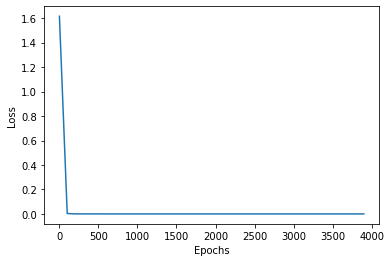

In [ ]:
x_plot=epoch
y_plot=loss_plot
plt.plot(x_plot,y_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
y,beta = model(t2)

In [ ]:
S_pred=y[:,0]
I_pred=y[:,1]

In [ ]:
print(S_pred)

tf.Tensor([1.0004939 1.0004954 1.0004976 ... 1.0011562 1.0011599 1.0011652], shape=(5000,), dtype=float32)


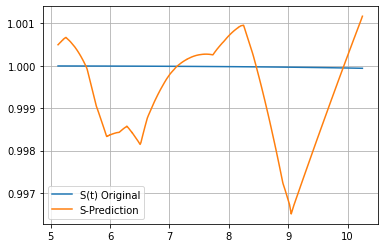

In [ ]:
plt.plot(t2,S_t2, label = "S(t) Original")
plt.plot(t2,S_pred, label = "S-Prediction")
plt.grid()
plt.legend()
plt.show()

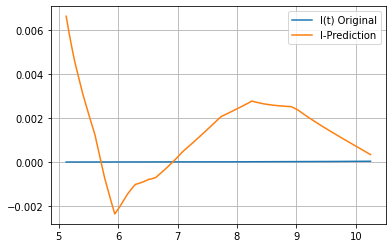

In [ ]:
plt.plot(t2,I_t2, label = "I(t) Original")
plt.plot(t2,I_pred, label = "I-Prediction")
plt.grid()
plt.legend()
plt.show()

In [ ]:
b = 0.7/(1+np.exp(-np.linspace(0,41,40000)))
b2=b[5000:10000]

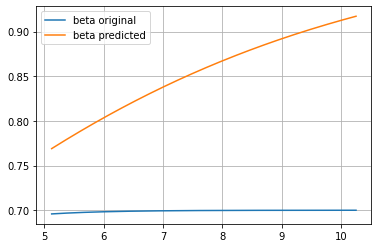

In [ ]:
plt.plot(t2,b2, label = "beta original")
plt.plot(t2,beta, label = "beta predicted")
plt.grid()
plt.legend()
plt.show()